In [48]:
from PageRank import *
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
read_airports("airports.txt")
read_routes("routes.txt")


Reading Airport file from airports.txt
Airports with IATA code: 5740
Reading Routes file from routes.txt
Routes of Airports with IATA code: 68292


## Effect of threshold on changing the ordering of nodes

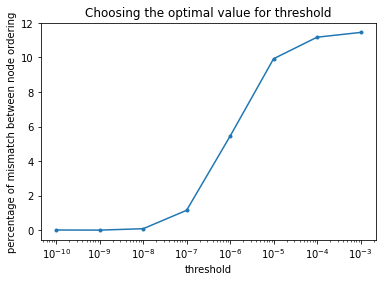

In [50]:
def sortAirports(threshold=1e-07):
    pageranks, _,_ = compute_pageranks(lam=0.85,threshold=threshold)
    sorted_pairs = sorted(zip(range(len(pageranks)), pageranks), key=lambda pair:pair[1], reverse=True)
    sorted_airport_index =[index for index, _ in sorted_pairs]
    return sorted_airport_index

thresholds = [1e-3, 1e-04,1e-05,1e-06,1e-07,1e-08, 1e-9,1e-10, 1e-11]
mismatch_percent = []
for t in range(len(thresholds)-1):
    ranks = sortAirports(thresholds[t])
    ranks2 = sortAirports(thresholds[t+1])
    mismatch = sum(a != b for a,b in zip(ranks, ranks2))/len(ranks)*100
    mismatch_percent.append(mismatch)
    
    
from matplotlib import pyplot
pyplot.plot(thresholds[:-1], mismatch_percent, '.-')
pyplot.xlabel('threshold')
pyplot.ylabel('percentage of mismatch between node ordering')
pyplot.title('Choosing the optimal value for threshold')
pyplot.xscale('log')

## Effect of number of incoming edges on page rank

Text(0, 0.5, 'Pagerank of each airport')

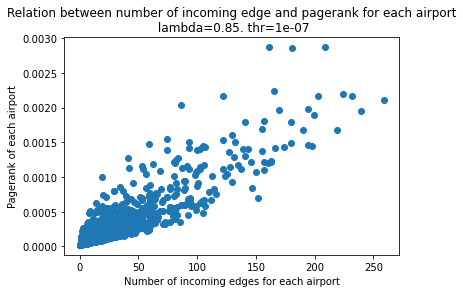

In [51]:
lambda_ = 0.85
thr=1e-7
pageranks, iterations, ver_pr = compute_pageranks(lam=lambda_,threshold=thr)

sorted_pairs = [(len(a.routes), pr) for a, pr in sorted(zip(airport_list, pageranks), key=lambda pair: len(pair[0].routes), reverse=True)]

airports_incoming_edge = [s[0] for s in sorted_pairs]
sorted_pageranks = [s[1] for s in sorted_pairs]

plt.figure()
plt.scatter(airports_incoming_edge, sorted_pageranks)
plt.title(f'Relation between number of incoming edge and pagerank for each airport\n lambda={lambda_}. thr={thr}')
plt.xlabel('Number of incoming edges for each airport')
plt.ylabel('Pagerank of each airport')

## Behaviour of Iteration and lambda based on time and iteration

In [52]:
sensitivity_analysis = {key: [] for key in ["Threshold", "Lambda", "Iteration", "Time", "SumPR"]}

In [53]:
lambdas = np.linspace(0.7, 0.9, 10)
thresholds = sorted([10 ** i for i in range(-10, -3, 1)], reverse=True)
for t in thresholds:
        for l in lambdas:
            time1 = time.time()
            pageranks, iterations, ver_pr = compute_pageranks(lam=l, threshold=t)
            time2 = time.time()
            sensitivity_analysis['Threshold'].append(t)
            sensitivity_analysis['Lambda'].append(round(l,2))
            sensitivity_analysis['Iteration'].append(iterations)
            sensitivity_analysis['Time'].append(round(time2 - time1,3))
            sensitivity_analysis['SumPR'].append(round(sum(pageranks),4))

In [54]:
df_sensitivity_analysis = pd.DataFrame(sensitivity_analysis)

In [55]:
colors=['brown','green', 'orange','red', 'dodgerblue','black',"pink","yellow"]
color_threshold_combine= list(zip(thresholds,colors))
color_dict = {}
for i,j in color_threshold_combine:
    color_dict [i] = j

<AxesSubplot:xlabel='Lambda', ylabel='Time'>

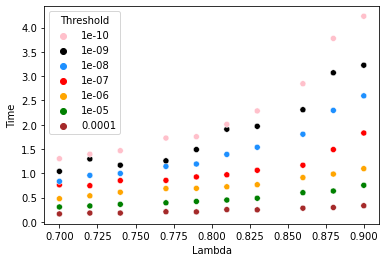

In [56]:
sns.scatterplot(x="Lambda", y="Time", hue="Threshold",
              data=df_sensitivity_analysis,palette=color_dict,
                   legend='full')

<AxesSubplot:xlabel='Iteration', ylabel='Lambda'>

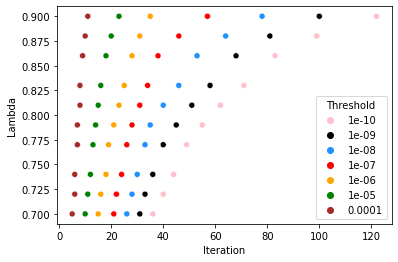

In [57]:
sns.scatterplot(x="Iteration", y="Lambda",hue="Threshold",
              data=df_sensitivity_analysis,palette=color_dict,
                   legend='full')

<AxesSubplot:xlabel='Time', ylabel='Iteration'>

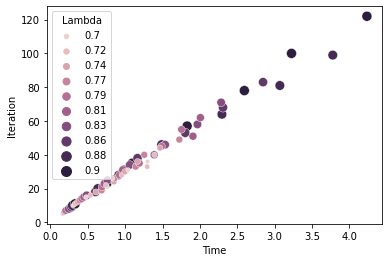

In [58]:
sns.scatterplot(x="Time", y="Iteration",hue="Lambda",
              data=df_sensitivity_analysis,size=df_sensitivity_analysis['Lambda'],sizes=(20,100),
                   legend='full')